In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

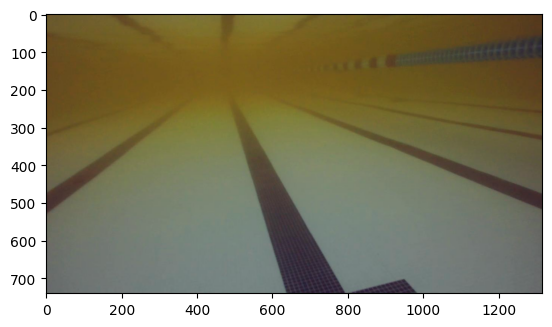

In [11]:
img = cv2.imread('rov_pool.jpg')
plt.imshow(img)

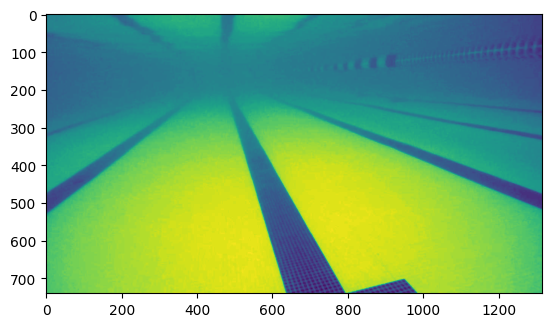

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

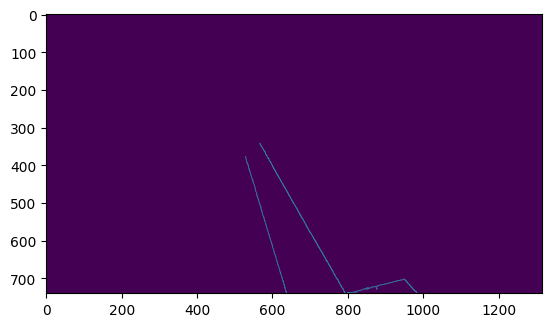

In [14]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
plt.imshow(edges)

3.2752293577981653
1.7377777777777779
1.7348066298342542
1.7374301675977655


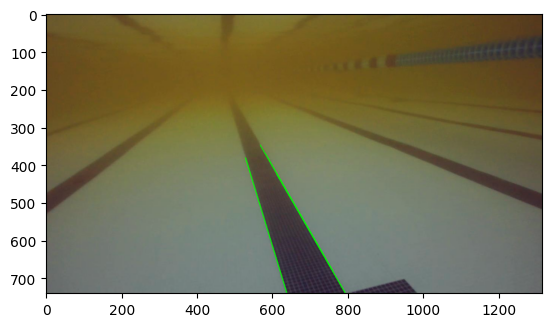

In [15]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 1, minLineLength=300, maxLineGap=200) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    print ((y2-y1)/(x2-x1))
    #print (x1)

plt.imshow(img)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from dt_apriltags import Detector

img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)


tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)


color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(color_img)

In [ ]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
ret, frame = vcap.read()

plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))